# Flood Prediction Machine Learning Model

In [5]:
# This Machine Learning Model uses 5 Machine Learning Algorithms namely KNN Classification, Logistic Regression[LR], Support
# Vector[SVM], Decision Tree[DT] and Random Forest[RF] to get the best possible model to predict the floods using ABUJA Rainfall Data.

#### Importing Required Libraries.

In [6]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/sample_data/ABUJA FLOODS.csv')
print(data)

       CITY  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0     ABUJA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1     ABUJA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2     ABUJA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3     ABUJA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4     ABUJA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..      ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113   ABUJA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114   ABUJA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115   ABUJA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116  ABUJA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117   ABUJA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV    DEC   ANNUAL RAINFALL FLOODS  
0    197.7  266.

In [7]:
data.head()

,CITY,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,ABUJA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,ABUJA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,ABUJA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,ABUJA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,ABUJA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [8]:
data.tail()

,CITY,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,ABUJA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,ABUJA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,ABUJA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,ABUJA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,ABUJA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [9]:
data.columns

Index(['CITY', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [60]:
# # Dropping the 'CITY' column
data = data.drop([ 'CITY'], axis=1)


In [61]:
data.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

# Finding number of missing values

In [12]:
data.isnull().sum()  # cheaking if any colomns is left empty or not.

,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0
SEP,0


# Analyzing the Dataset

In [13]:
# replacing the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [14]:
#Printing the clean data
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [15]:
# Seperating the data which we are going to use for prediction.
x=data.iloc[:,1:14]
x.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6


In [16]:
# Now seperate the flood label from the dataset, the TARGET.
y=data.iloc[:,-1]
y

,FLOODS
0,1
1,1
2,1
3,1
4,0
...,...
113,1
114,0
115,0
116,0


# Using sklearn to develop the ML Model

In [19]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.34371257, 0.56582278, 0.23721787, ..., 0.95570189, 0.2388724 ,
        0.49072457],
       [0.08023952, 0.03291139, 0.26347305, ..., 0.37952709, 0.60039565,
        0.52316779],
       [0.03832335, 0.23544304, 0.01381852, ..., 0.37563604, 0.29129575,
        0.50012478],
       ...,
       [0.02874251, 0.04810127, 0.16490097, ..., 0.28105358, 0.11622156,
        0.0448382 ],
       [0.02275449, 0.08607595, 0.04053432, ..., 0.18258007, 0.18793274,
        0.02008984],
       [0.34850299, 0.65949367, 0.22339936, ..., 0.28105358, 0.3214639 ,
        1.        ]])

In [20]:
#dividing the dataset into training dataset and test dataset.
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [21]:
x_train.shape


(94, 13)

In [22]:
x_test.shape

(24, 13)

In [23]:
x_test.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
47,43.0,8.3,48.2,125.0,212.3,910.2,619.0,487.9,166.6,183.9,215.6,19.2,3039.2
99,11.7,57.8,21.5,96.3,124.5,633.8,343.2,566.5,195.8,214.2,78.1,69.1,2412.6
79,0.0,0.9,20.8,114.8,105.3,745.9,754.0,438.1,139.5,282.3,162.3,39.5,2803.4
50,6.6,6.5,41.6,175.9,148.5,774.1,544.6,190.6,313.8,250.6,229.6,23.2,2705.5
40,15.9,4.6,12.7,101.9,417.5,797.6,517.9,458.5,257.9,221.6,220.5,84.6,3111.1


In [24]:
x_train.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
65,3.0,6.9,67.7,167.4,95.2,496.2,601.9,202.1,293.2,392.3,245.4,50.5,2621.7
86,0.6,0.8,4.3,57.2,108.3,572.6,221.0,396.6,157.0,272.1,216.0,131.1,2137.6
95,2.8,9.1,14.4,124.3,74.3,572.4,696.0,327.4,342.7,294.1,89.9,62.5,2610.0
52,13.1,22.6,18.5,132.4,55.4,340.5,1027.6,356.4,100.5,410.5,62.2,5.1,2544.9
37,0.3,79.0,53.3,164.5,179.6,681.6,648.6,287.9,223.2,223.7,69.5,22.9,2634.1


In [25]:
y_train.dtypes


dtype('int64')

In [26]:
# type casting.
#y_train=y_train.astype('int')
#y_train

In [27]:
#y_test=y_test.astype('int')
#y_test

# Using Prediction Algorithms:

## KNN classifier to predict

In [28]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
# Predicted chance of Flood.
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict

Predicted Values for the Floods:


array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1])

In [30]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
47     1
99     0
79     0
50     0
40     1
61     1
112    1
83     0
89     0
101    0
87     0
33     0
78     0
15     1
71     0
5      0
46     1
8      1
116    0
102    0
84     0
97     1
4      0
42     1
Name: FLOODS, dtype: int64


In [31]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1]


### How accurate is our model?

In [32]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print("confusion_matrix:  \n",confusion_matrix(y_test,y_predict))


Accuracy Score:100.000000
Recall Score:100.000000
ROC score:100.000000
confusion_matrix:  
 [[15  0]
 [ 0  9]]


## Logistic Regression to predict

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_val_predict

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
x_train_std=minmax.fit_transform(x_train)         # fit the values in between 0 and 1.
lr=LogisticRegression(max_iter=1000)
lr.fit(x_scaled,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

In [34]:
y_pred=lr.predict(x_test)
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [35]:
print(y_test.values)

[1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1]


### Accuracy and Efficiency of our Model

In [36]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print("confusion_matrix:\n",(confusion_matrix(y_test,y_pred)))


accuracy score:37.500000
recall score:100.000000
roc score:50.000000
confusion_matrix:
 [[ 0 15]
 [ 0  9]]


## Support Vector Classification to predict

In [37]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [38]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1]


In [39]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1]


### Accuracy of our model

In [40]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:100.000000
recall score:100.000000
roc score:100.000000
[[15  0]
 [ 0  9]]


# Decision Tree Classification to Predict

**1. Import your libraries and dataset**

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv('/content/sample_data/ABUJA FLOODS.csv')
print(data)

       CITY  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0     ABUJA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1     ABUJA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2     ABUJA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3     ABUJA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4     ABUJA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..      ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113   ABUJA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114   ABUJA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115   ABUJA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116  ABUJA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117   ABUJA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV    DEC   ANNUAL RAINFALL FLOODS  
0    197.7  266.

**2. Preprocess Your data**

In [42]:
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.34371257, 0.56582278, 0.23721787, ..., 0.95570189, 0.2388724 ,
        0.49072457],
       [0.08023952, 0.03291139, 0.26347305, ..., 0.37952709, 0.60039565,
        0.52316779],
       [0.03832335, 0.23544304, 0.01381852, ..., 0.37563604, 0.29129575,
        0.50012478],
       ...,
       [0.02874251, 0.04810127, 0.16490097, ..., 0.28105358, 0.11622156,
        0.0448382 ],
       [0.02275449, 0.08607595, 0.04053432, ..., 0.18258007, 0.18793274,
        0.02008984],
       [0.34850299, 0.65949367, 0.22339936, ..., 0.28105358, 0.3214639 ,
        1.        ]])

**3. Split Data into Training and Testing Sets**

In [43]:
#dividing the dataset into training dataset and test dataset.
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**4. Create and Train the Decision Tree Model**

In [44]:
model = DecisionTreeClassifier()  # You can customize hyperparameters here
model.fit(x_train, y_train)

DecisionTreeClassifier()

**5. Make Predictions**

In [45]:
y_pred = model.predict(x_test)
print("Predicted Values:")
y_pred

Predicted Values:


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1])

In [46]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1]


In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9583333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.92      0.96        13

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24


Confusion Matrix:
[[11  0]
 [ 1 12]]


# Using Random Forest Classifier to predict

**Import Libraries**

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Create and Train the Random Forest Model**

In [49]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

**Make Predictions**

In [50]:
y_pred = model.predict(x_test)

In [51]:

print("Predicted Values:")
y_pred

Predicted Values:


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1])

In [52]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1]


**Evaluate the Model**

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24


Confusion Matrix:
[[11  0]
 [ 0 13]]


In [54]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [55]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:100.000000
recall score:100.000000
roc score:100.000000
[[11  0]
 [ 0 13]]


# Final Accuracy of our Models

### Comparing all the prediction models

In [56]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Name,Score
0,KNN,0.958333
1,LR,0.541667
2,SVC,1.000000
3,DT,0.958333
4,RF,0.958333


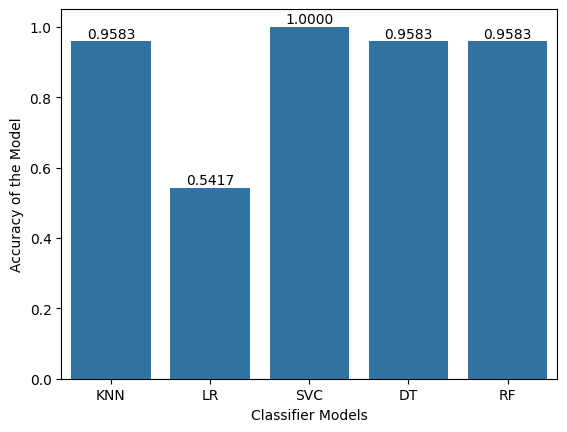

In [57]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center")

plt.show()

### So we can see and choose the best model for Prediction.